## Walkthrough 

This is a notebook intended to get you started using Retro on google colab. It follows alongside this [post](https://mikelyons.org/2018/05/25/Running-Retro-on-Google-Colab.html), for more information about what's going on in here, please see the post.

If you have any other questions / concerns feel free to reach out to me: mdl0394@gmail.com

# Step 1: Install the required dependencies

In [1]:
!apt-get install pkg-config lua5.1 build-essential libav-tools git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package build-esbsential


In [2]:
!pip install tqdm retrowrapper gym-retro
!pip install -U git+git://github.com/frenchie4111/dumbrain.git

  Cloning git://github.com/frenchie4111/dumbrain.git to /tmp/pip-req-build-lcah8kfy
  Running setup.py bdist_wheel for dumbrain ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-8rr5xrui/wheels/50/8e/6f/47c68c95113aa8c02ac02bde75673ace7c3d3636842c75fcb6
Successfully built dumbrain
  Found existing installation: dumbrain 0.1
    Uninstalling dumbrain-0.1:
      Successfully uninstalled dumbrain-0.1


# Step 2: Install your games

In [4]:
from dumbrain.rl.retro_contest.install_games import colabInstallGames
colabInstallGames()

Saving Sonic Roms.zip to Sonic Roms (11).zip


100%|██████████| 5767168/5767168 [00:00<00:00, 90234511.79it/s]

Importing SonicAndKnuckles3-Genesis
Importing SonicTheHedgehog-Genesis
Importing SonicTheHedgehog2-Genesis
Imported 3 games


In [31]:
# Don't run this command unless you already own the games, otherwise you are pirating :)
!python -m dumbrain.rl.retro_contest.install_games http://aiml.mikelyons.org/datasets/sonic/Sonic%20Roms.zip 

Namespace(colab_upload=False, download_url='http://aiml.mikelyons.org/datasets/sonic/Sonic%20Roms.zip', romdir='data/roms/')
3694592it [00:00, 4718045.76it/s]                                               
100%|███████████████████████████| 5767168/5767168 [00:00<00:00, 87602873.39it/s]
Importing SonicAndKnuckles3-Genesis
Importing SonicTheHedgehog-Genesis
Importing SonicTheHedgehog2-Genesis
Imported 3 games


In [24]:
import retro
list( filter( lambda game: game.startswith( 'Sonic' ), retro.list_games() ) )

['SonicTheHedgehog-Genesis',
 'SonicTheHedgehog2-Genesis',
 'SonicAndKnuckles3-Genesis']

# Step 3: Create an env using retrowrapper


In [0]:
import retrowrapper

env = retrowrapper.RetroWrapper(
    game='SonicTheHedgehog2-Genesis',
    state='MetropolisZone.Act1' 
)

# Step 4: Play the game

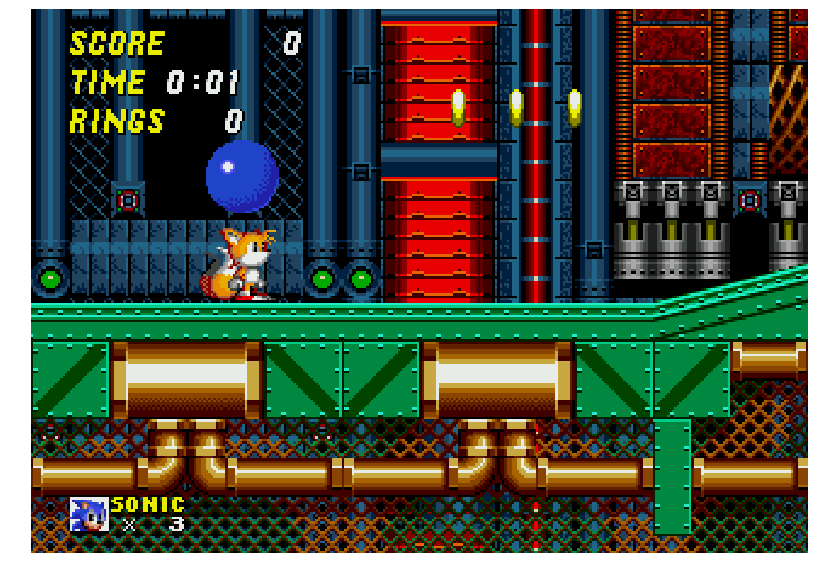

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

observation = env.reset()
for i in range( 100 ): # Take random actions for 100 steps
    random_action = env.action_space.sample()
    observation, reward, done, info = env.step( random_action )
    if done: # If the env is done make sure you reset it
        observation = env.reset()

plt.figure( figsize=( 20, 10 ) )
plt.axis( 'off' )
plt.imshow( observation )